# Getting to know the Skyline

In [206]:
#TODO: Get to know the skyline
#      - Get more info about activities on skyline from Alin
#      - Skyline peaks
#      - Skyline Expectation Maximization
#      - Shadow of skyline

#XXX: Was bedeutet die Skyline?
#XXX: Predict if activity on skyline? 

#Other 
#TODO: left align then split: For consistency purposes, and Seasons?, Delay affecting?, 
#TODO: Pseudonimize data for uni
#TODO: Drifts?

In [77]:
#%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

In [20]:
import sys
sys.path.append('..')

In [21]:
from processmining.plot import point_transformer as pt

In [22]:
csv_list = []
appended = pd.DataFrame()
#LUIGI_LOG_PATH='/usr/local/trustyou/home/andream/nfs/processmining/experiments'
LUIGI_LOG_PATH = '/usr/local/trustyou/home/andream/nfs/processmining/minilogs/daily/'
#LUIGI_LOG_PATH='/usr/local/trustyou/home/andream/git_tree/processmining/tests/data/'
#LUIGI_LOG_PATH = '/usr/local/trustyou/home/andream/nfs/processmining/minilogs/table-precomp/logs/tch/'
for filename in os.listdir(LUIGI_LOG_PATH):
    #if filename.endswith('.csv') and filename.startswith('catts_2traces_7act_varDevBothTimes_varDurDev_running-example.csv'):
    #if filename.endswith('.csv') and filename.startswith('catts_1trace_7act_v'):
    #if filename.endswith('.csv') and filename.startswith('catts_1trace_7act_0dur_running-example.csv'):
    #if filename.endswith('.csv') and filename.startswith('catts_1trace_7act_1dayDur_meets_running-example.csv'):
    #if filename.endswith('.csv') and filename.startswith('catts_1trace_7act_meetsStarts'):
    if filename.endswith('.csv') and filename.startswith('p'):
        log_path = LUIGI_LOG_PATH+'/'+filename
        csv_list.append(filename)
        print('Preprocessing... ',log_path)
        df = pd.read_csv(log_path, index_col=False)
        appended = appended.append(df)

#appended_df
csv_list.sort()
print(csv_list)

filename = os.path.splitext(csv_list[0])[0]

#appended_df.to_datetime(start_time, format="%Y-%m-%d:%H:%M:%S").sort_values()
appended['start_time'] = pd.to_datetime(appended['start_time'], format="%Y-%m-%d %H:%M:%S").sort_values()
appended['end_time'] = pd.to_datetime(appended['end_time'], format="%Y-%m-%d %H:%M:%S").sort_values()
appended = appended.sort_values(by=['start_time'], ascending=True)
appended['case'] = appended.apply(lambda row: str(row['case']), axis=1)
print('contains',len(appended), 'points')
appended.head()

Preprocessing...  /usr/local/trustyou/home/andream/nfs/processmining/minilogs/daily//param_catts_daily.2019-09-.csv
['param_catts_daily.2019-09-.csv']
contains 15711 points


case  \
14463  daily.2019-09-01_09-29-01.csv   
14468  daily.2019-09-01_09-29-01.csv   
14467  daily.2019-09-01_09-29-01.csv   
14464  daily.2019-09-01_09-29-01.csv   
14465  daily.2019-09-01_09-29-01.csv   

                                                                    activity  \
14463                                                               AllTasks   
14468                                                          CrawlFeedTask   
14467                                                         ProxySetupTask   
14464    DumpTask(target_filename=None)(chunk=prep)(sql_filename=daily_urls)   
14465  DumpTask(target_filename=None)(chunk=prep)(sql_filename=regular_urls)   

               start_time            end_time  
14463 2019-09-01 09:29:23 2019-09-03 03:43:13  
14468 2019-09-01 09:42:15 2019-09-01 10:01:16  
14467 2019-09-01 09:42:15 2019-09-01 09:54:13  
14464 2019-09-01 09:42:15 2019-09-01 09:43:44  
14465 2019-09-01 09:42:15 2019-09-01 10:09:02

In [23]:
excluding = appended[appended['activity']!='AllTasks']
#print(len(excluding))
average_trace_activities = pt.get_data_selection_avgtrace(pt.get_relative_timestamps(excluding)).sort_values(by=['num_start'])['activity'].tolist()

In [24]:
print(len(average_trace_activities))
#print('AllTasks' in average_trace_activities)

253


In [25]:
pd.set_option('display.max_colwidth', None)

index_used=[[0,31]]
#index_used=[[0,31],[21,51],[41,71],[61,91],[81,111],[87,117],
#            [101,119],[117,120],[118,122],[120,126],[123,156],
#            [139,170],[141,171],[170,178],[175,216],[206,246],[216,256]]

for indexes in index_used:
    #subset = appended[appended['activity'].str.startswith('ExtractTask') & appended['case']]
    subset = appended[appended['activity'].isin(average_trace_activities[indexes[0]:indexes[1]])]
    #subset = appended[appended['activity'].isin(average_trace_activities[indexes[0]:indexes[1]]) & ~appended['activity'].str.startswith('ExtractTask(crawler=creepy-crawly)(chunk')]

    output_prefix = LUIGI_LOG_PATH+'graphs/avgActSlideSplit/'+filename+'All_'+str(indexes[0])+'_'+str(indexes[1])+'act_'+str(len(subset))+'pts'
    #print(output_prefix)

    print(len(subset),' length of subset')
    
    #print(average_trace_activities[indexes[0]:indexes[1]])
    #subset.head()
    #subset= appended.copy()
    #subset = appended[appended['case']=='daily.2019-09-01_09-29-01.csv']
    #snippet = pt.plot_point_transformer_selection(subset, output_prefix)
    #snippet.head()

404  length of subset


In [26]:
#subset = appended.copy()
#subset = appended[appended['activity'].str.startswith('CrawlTask')].head(1000)
#print(subset['activity'][0])

output_prefix = LUIGI_LOG_PATH+'graphs/'+filename
print(output_prefix)
#snippet = pt.plot_point_transformer_selection(subset, output_prefix)
subset = pt.get_relative_timestamps(subset, ['AllTasks'])
print(len(subset),' length of subset')
subset.head()

/usr/local/trustyou/home/andream/nfs/processmining/minilogs/daily/graphs/param_catts_daily.2019-09-
404  length of subset


case  \
0   daily.2019-09-01_09-29-01.csv   
60  daily.2019-09-01_09-29-01.csv   
61  daily.2019-09-01_09-29-01.csv   
62  daily.2019-09-01_09-29-01.csv   
63  daily.2019-09-01_09-29-01.csv   

                                                                 activity  \
0                                                           CrawlFeedTask   
60    DumpTask(target_filename=None)(chunk=prep)(sql_filename=other_urls)   
61  DumpTask(target_filename=None)(chunk=prep)(sql_filename=regular_urls)   
62    DumpTask(target_filename=None)(chunk=prep)(sql_filename=daily_urls)   
63                                                         ProxySetupTask   

   rel_start  rel_end  num_start  num_end          start_time  \
0    0:00:00  0:19:01        0.0   1141.0 2019-09-01 09:42:15   
60   0:00:00  0:00:39        0.0     39.0 2019-09-01 09:42:15   
61   0:00:00  0:26:47        0.0   1607.0 2019-09-01 09:42:15   
62   0:00:00  0:01:29        0.0     89.0 2019-09-01 09:42:15   
63   0:00:00  0:11:58        0.0    718.0 2019-09-01 09:42:15   

              end_time  
0  2019-09-01 10:01:16  
60 2019-09-01 09:42:54  
61 2019-09-01 10:09:02  
62 2019-09-01 09:43:44  
63 2019-09-01 09:54:13

## How many points appear on the skyline/log?
Questions:
* How many points are commonly on the skyline/log?
* How many activities are commonly in the skyline/complete log?
* How many of these activities are unique? 

Thoughts:
* Anomaly of number of points being out of expected boundries for a specific trace. 
* Anomaly of percentage of skyline points being out if expected boundries.

Open questions: 

In [27]:
subset = appended.copy()
subset = pt.get_relative_timestamps(subset, ['AllTasks'])
skyline_points = pt.get_skyline_points(subset)
representative = skyline_points[['case','activity']].drop_duplicates()

In [183]:
print(len(subset),' points in total distributed among', len(subset['case'].unique()), 'cases\n\nInfo about the skyline:')
print('- ',len(skyline_points['activity'].unique()),'/',len(subset['activity'].unique()), 'activities are part of the skyline.')
print('- ',len(skyline_points),'/',len(subset),'=', round(len(skyline_points)/len(subset)*100,2), '% points on the skylines')
print('- ',len(representative),'/',len(skyline_points),'=', round(len(representative)/len(skyline_points)*100,2), '% unique activities on the skylines.') 
print("   'Unique' meaning there are no two points with the same 'activity' on the skyline of the same trace. ")


15708  points in total distributed among 13 cases

Info about the skyline:
-  253 / 253 activities are part of the skyline.
-  2883 / 15708 = 18.35 % points on the skylines
-  2854 / 2883 = 98.99 % unique activities on the skylines.
   'Unique' meaning there are no two points with the same 'activity' on the skyline of the same trace. 


In [203]:
all_by_case = subset.groupby('case').size().reset_index(name='total_points_in_case').sort_values(by=['total_points_in_case'], ascending=False)
skyline_by_case = skyline_points.groupby('case').size().reset_index(name='skyline_points_in_case').sort_values(by=['skyline_points_in_case'], ascending=False)
r_by_case = representative.groupby('case').size().reset_index(name='unique_skyline_activities_in_case').sort_values(by=['unique_skyline_activities_in_case'], ascending=False)
by_case = r_by_case.merge(skyline_by_case, on='case')
#all_by_case.plot.hist(bins=8, alpha=0.5)

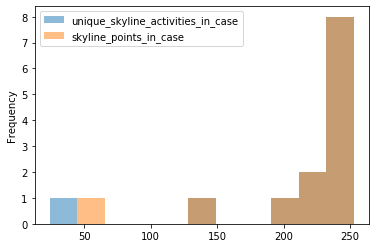

In [204]:
by_case.plot.hist(bins=11, alpha=0.5)

In [210]:
merged_by_case = by_case.merge(all_by_case)[['case','total_points_in_case','skyline_points_in_case', 'unique_skyline_activities_in_case']].sort_values(by=['total_points_in_case'], ascending=False)
merged_by_case['skyline_percentage'] = merged_by_case.apply(lambda row: round(row['skyline_points_in_case']/row['total_points_in_case']*100,2), axis=1)
merged_by_case['unique_percentage'] = merged_by_case.apply(lambda row: round(row['unique_skyline_activities_in_case']/row['skyline_points_in_case']*100,2), axis=1)
merged_by_case


case  total_points_in_case  \
7   daily.2019-09-22_07-40-01.csv                  1252   
5   daily.2019-09-18_14-08-01.csv                  1251   
9   daily.2019-09-04_23-23-01.csv                  1251   
1   daily.2019-09-11_05-40-02.csv                  1249   
6   daily.2019-09-20_12-49-01.csv                  1249   
3   daily.2019-09-15_01-41-01.csv                  1248   
2   daily.2019-09-13_04-11-01.csv                  1247   
4   daily.2019-09-16_19-44-01.csv                  1247   
8   daily.2019-09-03_03-44-01.csv                  1247   
10  daily.2019-09-06_20-34-01.csv                  1247   
12  daily.2019-09-01_09-29-01.csv                  1247   
0   daily.2019-09-09_01-34-02.csv                  1231   
11  daily.2019-09-24_05-05-02.csv                   742   

    skyline_points_in_case  unique_skyline_activities_in_case  \
7                      253                                253   
5                      253                                253   
9                      231                                231   
1                      253                                253   
6                      253                                253   
3                      253                                253   
2                      253                                253   
4                      253                                253   
8                      231                                231   
10                     211                                210   
12                      52                                 24   
0                      253                                253   
11                     134                                134   

    skyline_percentage  unique_percentage  
7                20.21             100.00  
5                20.22             100.00  
9                18.47             100.00  
1                20.26             100.00  
6                20.26             100.00  
3                20.27             100.00  
2                20.29             100.00  
4                20.29             100.00  
8                18.52             100.00  
10               16.92              99.53  
12                4.17              46.15  
0                20.55             100.00  
11               18.06             100.00

### Anomaly of number of points in trace: 

Thoughts about origin of such an anomaly:  
* More activities than expected being restarted. (for upper bound)
* A trace being unexpectedly interrupted. (for lower bound)
* A log being incomplete. (for lower bound)

In [220]:
avg_total_points = round(merged_by_case['total_points_in_case'].mean(),2)
std_total_points = round(merged_by_case['total_points_in_case'].std(),2)
lower_total_points = math.floor(avg_total_points-std_total_points)
upper_total_points = math.ceil(avg_total_points+std_total_points)

print('Expectation: A trace has between', lower_total_points, 'and ', upper_total_points ,'points.\n\nThe following anomalies were found:')

suspects = merged_by_case[(merged_by_case['total_points_in_case']<lower_total_points) | (merged_by_case['total_points_in_case']>upper_total_points)]
suspects

Expectation: A trace has between 1068 and  1349 points.

The following anomalies were found:


case  total_points_in_case  \
11  daily.2019-09-24_05-05-02.csv                   742   

    skyline_points_in_case  unique_skyline_activities_in_case  \
11                     134                                134   

    skyline_percentage  unique_percentage  
11               18.06              100.0

### Anomaly of percentage of skyline points

Thoughts about origin of such an anomaly:  
* Deviation on specific activity/ies for a specific trace
* Upper: Tasks that normally do not last that long are

Open questions: 
* Further investigate points in shadow of each other.

In [229]:
avg_skyline_percentage = round(merged_by_case['skyline_percentage'].mean(),2)
std_skyline_percentage = round(merged_by_case['skyline_percentage'].std(),2)

lower_skyline_percentage = round(avg_skyline_percentage-std_skyline_percentage,2)
upper_skyline_percentage = round(avg_skyline_percentage+std_skyline_percentage,2)

avg_unique_percentage = round(merged_by_case['unique_percentage'].mean(),2)
std_unique_percentage = min(round(merged_by_case['unique_percentage'].std(),2), 100)

lower_unique_percentage = round(avg_unique_percentage-std_unique_percentage,2)
upper_unique_percentage = min(round(avg_unique_percentage+std_unique_percentage,2), 100)

suspects = merged_by_case[(merged_by_case['skyline_percentage']<lower_skyline_percentage) | (merged_by_case['skyline_percentage']>upper_skyline_percentage)| 
                          (merged_by_case['unique_percentage']<lower_unique_percentage) | (merged_by_case['unique_percentage']>upper_unique_percentage)]

print('Expectation: A trace has between', lower_skyline_percentage, '% and ', upper_skyline_percentage ,'% of its points in the skyline. And between ',
      lower_unique_percentage,'% and',upper_unique_percentage,'% of them are unique.\n\nThe following anomalies were found:')
suspects

Expectation: A trace has between 13.94 % and  22.76 % of its points in the skyline. And between  80.89 % and 100 % of them are unique.

The following anomalies were found:


case  total_points_in_case  \
12  daily.2019-09-01_09-29-01.csv                  1247   

    skyline_points_in_case  unique_skyline_activities_in_case  \
12                      52                                 24   

    skyline_percentage  unique_percentage  
12                4.17              46.15

### How many activities appear per case?

Thoughts: If any activity deviates too much for any case it can be consider as a anomaly for the that specific trace. Leading to further investigation. 

In [186]:
by_case_activity = subset.groupby(['activity', 'case']).size().reset_index(name='total_points_in_case').sort_values(by=['total_points_in_case'], ascending=False)
by_case_activity= by_case_activity.pivot(index='activity', columns='case', values='total_points_in_case').reset_index()
by_case_activity=by_case_activity.set_index('activity')


In [197]:
# Select any row where any column fullfills any condition:
mask = by_case_activity.applymap(lambda x: x>1)
candidates = by_case_activity[mask.any(axis=1)]
candidates

case                                                                          daily.2019-09-01_09-29-01.csv  \
activity                                                                                                      
CrawlTask(crawler=creepy-crawly)(chunk=01)                                                            240.0   
CrawlTask(crawler=creepy-crawly)(chunk=02)                                                            120.0   
CrawlTask(crawler=creepy-crawly)(chunk=03)                                                            140.0   
ExtractTask(crawler=creepy-crawly)(chunk=01)                                                          240.0   
ExtractTask(crawler=creepy-crawly)(chunk=02)                                                          120.0   
ExtractTask(crawler=creepy-crawly)(chunk=03)                                                          140.0   
GroupTask(deploy=False)(chunk=01)(datacenter=eu)(inc=False)(datastore=mongo)                            1.0   
GroupTask(deploy=False)(chunk=02)(datacenter=eu)(inc=True)(datastore=mongo)                             1.0   
ProxySetupTask                                                                                          1.0   
ResyncReviewPropertiesTask(chunk=03)                                                                    1.0   

case                                                                          daily.2019-09-03_03-44-01.csv  \
activity                                                                                                      
CrawlTask(crawler=creepy-crawly)(chunk=01)                                                            240.0   
CrawlTask(crawler=creepy-crawly)(chunk=02)                                                            120.0   
CrawlTask(crawler=creepy-crawly)(chunk=03)                                                            140.0   
ExtractTask(crawler=creepy-crawly)(chunk=01)                                                          240.0   
ExtractTask(crawler=creepy-crawly)(chunk=02)                                                          120.0   
ExtractTask(crawler=creepy-crawly)(chunk=03)                                                          140.0   
GroupTask(deploy=False)(chunk=01)(datacenter=eu)(inc=False)(datastore=mongo)                            1.0   
GroupTask(deploy=False)(chunk=02)(datacenter=eu)(inc=True)(datastore=mongo)                             1.0   
ProxySetupTask                                                                                          1.0   
ResyncReviewPropertiesTask(chunk=03)                                                                    1.0   

case                                                                          daily.2019-09-04_23-23-01.csv  \
activity                                                                                                      
CrawlTask(crawler=creepy-crawly)(chunk=01)                                                            240.0   
CrawlTask(crawler=creepy-crawly)(chunk=02)                                                            120.0   
CrawlTask(crawler=creepy-crawly)(chunk=03)                                                            140.0   
ExtractTask(crawler=creepy-crawly)(chunk=01)                                                          240.0   
ExtractTask(crawler=creepy-crawly)(chunk=02)                                                          121.0   
ExtractTask(crawler=creepy-crawly)(chunk=03)                                                          140.0   
GroupTask(deploy=False)(chunk=01)(datacenter=eu)(inc=False)(datastore=mongo)                            1.0   
GroupTask(deploy=False)(chunk=02)(datacenter=eu)(inc=True)(datastore=mongo)                             4.0   
ProxySetupTask                                                                                          1.0   
ResyncReviewPropertiesTask(chunk=03)                                                                    1.0   

c

In [188]:
stats_case_activity = pd.DataFrame()
stats_case_activity['avg']=by_case_activity.mean(axis=1).apply(math.floor)
stats_case_activity['stddev']=by_case_activity.std(axis=1)
stats_case_activity['lower_bound']=stats_case_activity.apply(lambda row: row['avg']-row['stddev'], axis=1)
stats_case_activity['upper_bound']=stats_case_activity.apply(lambda row: row['avg']+row['stddev'], axis=1)
stats_case_activity[stats_case_activity['stddev']>0]

#TODO: Anomaly detection when any row exceeds lower or upper bound from stats.

avg  \
activity                                                                            
CrawlTask(crawler=creepy-crawly)(chunk=01)                                    240   
CrawlTask(crawler=creepy-crawly)(chunk=02)                                    120   
CrawlTask(crawler=creepy-crawly)(chunk=03)                                    132   
ExtractTask(crawler=creepy-crawly)(chunk=02)                                  120   
ExtractTask(crawler=creepy-crawly)(chunk=03)                                  134   
GroupTask(deploy=False)(chunk=01)(datacenter=eu)(inc=False)(datastore=mongo)    1   
GroupTask(deploy=False)(chunk=02)(datacenter=eu)(inc=True)(datastore=mongo)     1   
ProxySetupTask                                                                  1   
ResyncReviewPropertiesTask(chunk=03)                                            1   

                                                                                 stddev  \
activity                                                                                  
CrawlTask(crawler=creepy-crawly)(chunk=01)                                     0.877058   
CrawlTask(crawler=creepy-crawly)(chunk=02)                                     0.621582   
CrawlTask(crawler=creepy-crawly)(chunk=03)                                    20.542014   
ExtractTask(crawler=creepy-crawly)(chunk=02)                                   0.452267   
ExtractTask(crawler=creepy-crawly)(chunk=03)                                  20.854809   
GroupTask(deploy=False)(chunk=01)(datacenter=eu)(inc=False)(datastore=mongo)   0.389249   
GroupTask(deploy=False)(chunk=02)(datacenter=eu)(inc=True)(datastore=mongo)    0.866025   
ProxySetupTask                                                                 0.277350   
ResyncReviewPropertiesTask(chunk=03)                                           0.577350   

                                                                              lower_bound  \
activity                                                                                    
CrawlTask(crawler=creepy-crawly)(chunk=01)                                     239.122942   
CrawlTask(crawler=creepy-crawly)(chunk=02)                                     119.378418   
CrawlTask(crawler=creepy-crawly)(chunk=03)                                     111.457986   
ExtractTask(crawler=creepy-crawly)(chunk=02)                                   119.547733   
ExtractTask(crawler=creepy-crawly)(chunk=03)                                   113.145191   
GroupTask(deploy=False)(chunk=01)(datacenter=eu)(inc=False)(datastore=mongo)     0.610751   
GroupTask(deploy=False)(chunk=02)(datacenter=eu)(inc=True)(datastore=mongo)      0.133975   
ProxySetupTask                                                                   0.722650   
ResyncReviewPropertiesTask(chunk=03)                                             0.422650   

                                                                              upper_bound  
activity                                                                                   
CrawlTask(crawler=creepy-crawly)(chunk=01)                                     240.877058  
CrawlTask(crawler=creepy-crawly)(chunk=02)                                     120.621582  
CrawlTask(crawler=creepy-crawly)(chunk=03)                                     152.542014  
ExtractTask(crawler=creepy-crawly)(chunk=02)                                   120.452267  
ExtractTask(crawler=creepy-crawly)(chunk=03)                                   154.854809  
GroupTask(deploy=False)(chunk=01)(datacenter=eu)(inc=False)(datastore=mongo)     1.389249  
GroupTask(deploy=False)(chunk=02)(datacenter=eu)(inc=True)(datastore=mongo)      1.866025  
ProxySetupTask                                                                   1.277350  
ResyncReviewPropertiesTask(chunk=03)                                             1.577350

### How many activities appear on a skyline per case?

Thoughts: If any activity deviates too much for any case it can be consider as a anomaly for the that specific trace. I suspect deviations on the skyline lead to deviations of the overall time. 

Open questions:
* What is the meaning of the deviation of this specific activities on the skyline in finding out the anomaly activity for a specific trace?

In [200]:
s_by_case_activity = skyline_points.groupby(['activity', 'case']).size().reset_index(name='total_points_in_case').sort_values(by=['total_points_in_case'], ascending=False)
s_by_case_activity= s_by_case_activity.pivot(index='activity', columns='case', values='total_points_in_case').reset_index()
s_by_case_activity=s_by_case_activity.set_index('activity')

In [201]:
# Select any row where any column fullfills any condition:
mask = s_by_case_activity.applymap(lambda x: x>1)
more_than = s_by_case_activity[mask.any(axis=1)]
more_than

case                                          daily.2019-09-01_09-29-01.csv  \
activity                                                                      
CrawlTask(crawler=creepy-crawly)(chunk=01)                             13.0   
CrawlTask(crawler=creepy-crawly)(chunk=02)                              4.0   
CrawlTask(crawler=creepy-crawly)(chunk=03)                              8.0   
ExtractTask(crawler=creepy-crawly)(chunk=01)                            4.0   
ExtractTask(crawler=creepy-crawly)(chunk=03)                            4.0   

case                                          daily.2019-09-03_03-44-01.csv  \
activity                                                                      
CrawlTask(crawler=creepy-crawly)(chunk=01)                              1.0   
CrawlTask(crawler=creepy-crawly)(chunk=02)                              1.0   
CrawlTask(crawler=creepy-crawly)(chunk=03)                              1.0   
ExtractTask(crawler=creepy-crawly)(chunk=01)                            1.0   
ExtractTask(crawler=creepy-crawly)(chunk=03)                            1.0   

case                                          daily.2019-09-04_23-23-01.csv  \
activity                                                                      
CrawlTask(crawler=creepy-crawly)(chunk=01)                              1.0   
CrawlTask(crawler=creepy-crawly)(chunk=02)                              1.0   
CrawlTask(crawler=creepy-crawly)(chunk=03)                              1.0   
ExtractTask(crawler=creepy-crawly)(chunk=01)                            1.0   
ExtractTask(crawler=creepy-crawly)(chunk=03)                            1.0   

case                                          daily.2019-09-06_20-34-01.csv  \
activity                                                                      
CrawlTask(crawler=creepy-crawly)(chunk=01)                              1.0   
CrawlTask(crawler=creepy-crawly)(chunk=02)                              1.0   
CrawlTask(crawler=creepy-crawly)(chunk=03)                              1.0   
ExtractTask(crawler=creepy-crawly)(chunk=01)                            1.0   
ExtractTask(crawler=creepy-crawly)(chunk=03)                            2.0   

case                                          daily.2019-09-09_01-34-02.csv  \
activity                                                                      
CrawlTask(crawler=creepy-crawly)(chunk=01)                              1.0   
CrawlTask(crawler=creepy-crawly)(chunk=02)                              1.0   
CrawlTask(crawler=creepy-crawly)(chunk=03)                              1.0   
ExtractTask(crawler=creepy-crawly)(chunk=01)                            1.0   
ExtractTask(crawler=creepy-crawly)(chunk=03)                            1.0   

case                                          daily.2019-09-11_05-40-02.csv  \
activity                                                                      
CrawlTask(crawler=creepy-crawly)(chunk=01)                              1.0   
CrawlTask(crawler=creepy-crawly)(chunk=02)                              1.0   
CrawlTask(crawler=creepy-crawly)(chunk=03)                              1.0   
ExtractTask(crawler=creepy-crawly)(chunk=01)                            1.0   
ExtractTask(crawler=creepy-crawly)(chunk=03)                            1.0   

case                                          daily.2019-09-13_04-11-01.csv  \
activity                                                                      
CrawlTask(crawler=creepy-crawly)(chunk=01)                              1.0   
CrawlTask(crawler=creepy-crawly)(chunk=02)                              1.0   
CrawlTask(crawler=creepy-crawly)(chunk=03)                              1.0   
ExtractTask(crawler=creepy-crawly)(chunk=01)                            1.0   
ExtractTask(crawler=creepy-crawly)(chunk=03)                            1.0   

case                                          daily.2019-09-15_01-41-01.csv  \
activity                                   

In [202]:
stats_s_case_activity = pd.DataFrame()
stats_s_case_activity['avg']=s_by_case_activity.mean(axis=1).apply(math.floor)
stats_s_case_activity['stddev']=s_by_case_activity.std(axis=1)
stats_s_case_activity['lower_bound']=stats_s_case_activity.apply(lambda row: row['avg']-row['stddev'], axis=1)
stats_s_case_activity['upper_bound']=stats_s_case_activity.apply(lambda row: row['avg']+row['stddev'], axis=1)
stats_s_case_activity[stats_s_case_activity['stddev']>0]

#TODO: Anomaly detection when any row exceeds lower or upper bound from stats.

avg    stddev  lower_bound  \
activity                                                                   
CrawlTask(crawler=creepy-crawly)(chunk=01)      1  3.328201    -2.328201   
CrawlTask(crawler=creepy-crawly)(chunk=02)      1  0.866025     0.133975   
CrawlTask(crawler=creepy-crawly)(chunk=03)      1  1.941451    -0.941451   
ExtractTask(crawler=creepy-crawly)(chunk=01)    1  0.832050     0.167950   
ExtractTask(crawler=creepy-crawly)(chunk=03)    1  0.854850     0.145150   

                                              upper_bound  
activity                                                   
CrawlTask(crawler=creepy-crawly)(chunk=01)       4.328201  
CrawlTask(crawler=creepy-crawly)(chunk=02)       1.866025  
CrawlTask(crawler=creepy-crawly)(chunk=03)       2.941451  
ExtractTask(crawler=creepy-crawly)(chunk=01)     1.832050  
ExtractTask(crawler=creepy-crawly)(chunk=03)     1.854850

## What set of activities are expected to appear on the skyline? 

* What activities are commonly on the skyline? 
* What traces deviate? and why?
* Frequent pattern mining for skyline activities? 
* Can we predict what activities will be on the skyline?

In [230]:
all_by_activity = subset.groupby('activity').size().reset_index(name='total_points_in_activity').sort_values(by=['total_points_in_activity'], ascending=False)
skyline_by_activity = skyline_points.groupby('activity').size().reset_index(name='skyline_points_in_activity').sort_values(by=['skyline_points_in_activity'], ascending=False)
r_by_activity = representative.groupby('activity').size().reset_index(name='unique_cases_in_skyline_activity').sort_values(by=['unique_cases_in_skyline_activity'], ascending=False)
by_activity = r_by_activity.merge(skyline_by_activity, on='activity')
#by_activity = by_activity.merge(all_by_activity, on='activity')
#all_by_activity.plot.hist(bins=16, alpha=0.5)

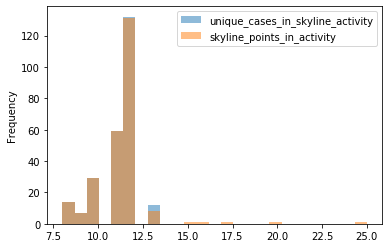

In [154]:
by_activity.plot.hist(bins=25, alpha=0.5, )

In [243]:
merged_by_activity = by_activity.merge(all_by_activity)[['activity','total_points_in_activity','skyline_points_in_activity', 'unique_cases_in_skyline_activity']].sort_values(by=['total_points_in_activity'], ascending=False)
merged_by_activity['skyline_percentage'] = round(merged_by_activity.apply(lambda row: row['skyline_points_in_activity']/row['total_points_in_activity']*100, axis=1),2)

total_diffferent_cases= len(subset['case'].unique())
total_points_in_skyline = merged_by_activity['skyline_points_in_activity'].sum()

merged_by_activity['prob_unique_skyline_appearance']=round(merged_by_activity.apply(lambda row: row['unique_cases_in_skyline_activity']/total_diffferent_cases*100, axis=1),2)
merged_by_activity['prob_skyline_appearance']=round(merged_by_activity.apply(lambda row: row['skyline_points_in_activity']/(total_points_in_skyline/total_diffferent_cases)*100, axis=1),2)

merged_by_activity.head(20)

activity  \
5                                         CrawlTask(crawler=creepy-crawly)(chunk=01)   
8                                       ExtractTask(crawler=creepy-crawly)(chunk=01)   
9                                       ExtractTask(crawler=creepy-crawly)(chunk=03)   
4                                         CrawlTask(crawler=creepy-crawly)(chunk=03)   
185                                     ExtractTask(crawler=creepy-crawly)(chunk=02)   
125                                       CrawlTask(crawler=creepy-crawly)(chunk=02)   
242      GroupTask(deploy=False)(chunk=02)(datacenter=eu)(inc=True)(datastore=mongo)   
1                                                                     ProxySetupTask   
246                                             ResyncReviewPropertiesTask(chunk=03)   
82      GroupTask(deploy=False)(chunk=01)(datacenter=eu)(inc=False)(datastore=mongo)   
101  ConvertDumpTask(target_filename=review_2013_1)(chunk=prep)(sql_filename=review)   
96   ConvertDumpTask(target_filename=review_2015_3)(chunk=prep)(sql_filename=review)   
97   ConvertDumpTask(target_filename=review_2015_4)(chunk=prep)(sql_filename=review)   
98   ConvertDumpTask(target_filename=review_2016_1)(chunk=prep)(sql_filename=review)   
99   ConvertDumpTask(target_filename=review_2016_2)(chunk=prep)(sql_filename=review)   
100  ConvertDumpTask(target_filename=review_2016_3)(chunk=prep)(sql_filename=review)   
0           DumpTask(target_filename=review_2019_2)(chunk=prep)(sql_filename=review)   
102  ConvertDumpTask(target_filename=review_2012_3)(chunk=prep)(sql_filename=review)   
103  ConvertDumpTask(target_filename=review_2017_1)(chunk=prep)(sql_filename=review)   
95   ConvertDumpTask(target_filename=review_2015_2)(chunk=prep)(sql_filename=review)   

     total_points_in_activity  skyline_points_in_activity  \
5                        3126                          25   
8                        3120                          16   
9                        1747                          17   
4                        1727                          20   
185                      1443                          11   
125                      1443                          15   
242                        15                           8   
1                          14                          13   
246                        14                           8   
82                         14                          12   
101                        13                          12   
96                         13                          12   
97                         13                          12   
98                         13                          12   
99                         13                          12   
100                        13                          12   
0                          13                          13   
102                        13                          12   
103                        13                          12   
95                         13                          12   

     unique_cases_in_skyline_activity  skyline_percentage  \
5                                  13                0.80   
8                                  13                0.51   
9                                  13                0.97   
4                                  13                1.16   
185                                11                0.76   
125                                12                1.04   
242                                 8               53.33   
1                                  13               92.86   
246                                 8               57.14   
82                                 12               85.71   
101                                12               92.31   
96                                 12               92.31   
97                                 12               92.31   
98                                 12               92.31   
99                            

In [156]:
lessthan = all_by_activity[all_by_activity['total_points_in_activity']<13]['activity'].values.tolist()
subset[(subset['case']=='daily.2019-09-24_05-05-02.csv') & (subset['activity'].isin(lessthan))]

Empty DataFrame
Columns: [case, activity, rel_start, rel_end, num_start, num_end, start_time, end_time]
Index: []

#### How many activities are commonly in the skyline?
- Percentage of skyline points per case deviation.
- Percentage of points on skyline per activities per case, compare to average for certain activity.

Ideas for anomaly detection using number of points in skyline and case:
- Anomaly if for any activity: it appears less times than there is cases.
- Anomaly if any case deviates strongly in number of total points
- Anomaly Detection through deviation of average. Overlapp of deviation on cases and activities per case could be helpful.

Questions:
- Do all cases have the same amount of CrawlTasks and ExtractTasks? 

In [240]:
case_selection = ['daily.2019-09-24_05-05-02.csv', 'daily.2019-09-09_01-34-02.csv', 'daily.2019-09-01_09-29-01.csv']
#case_selection = 
#pt.plot_all_traces(snippet=skyline_points[skyline_points['case'].isin(case_selection)], draw_skylines=1, show_plot=1)
#subset.head()
#pt.plot_all_traces(snippet=subset, draw_skylines=1, show_plot=1)

case  \
52  daily.2019-09-01_09-29-01.csv   
53  daily.2019-09-01_09-29-01.csv   
54  daily.2019-09-01_09-29-01.csv   
55  daily.2019-09-01_09-29-01.csv   
56  daily.2019-09-01_09-29-01.csv   

                                                                 activity  \
52                                                          CrawlFeedTask   
53    DumpTask(target_filename=None)(chunk=prep)(sql_filename=other_urls)   
54    DumpTask(target_filename=None)(chunk=prep)(sql_filename=daily_urls)   
55  DumpTask(target_filename=None)(chunk=prep)(sql_filename=regular_urls)   
56                                                         ProxySetupTask   

   rel_start  rel_end  num_start  num_end          start_time  \
52   0:12:52  0:31:53      772.0   1913.0 2019-09-01 09:42:15   
53   0:12:52  0:13:31      772.0    811.0 2019-09-01 09:42:15   
54   0:12:52  0:14:21      772.0    861.0 2019-09-01 09:42:15   
55   0:12:52  0:39:39      772.0   2379.0 2019-09-01 09:42:15   
56   0:12:52  0:24:50      772.0   1490.0 2019-09-01 09:42:15   

              end_time  
52 2019-09-01 10:01:16  
53 2019-09-01 09:42:54  
54 2019-09-01 09:43:44  
55 2019-09-01 10:09:02  
56 2019-09-01 09:54:13

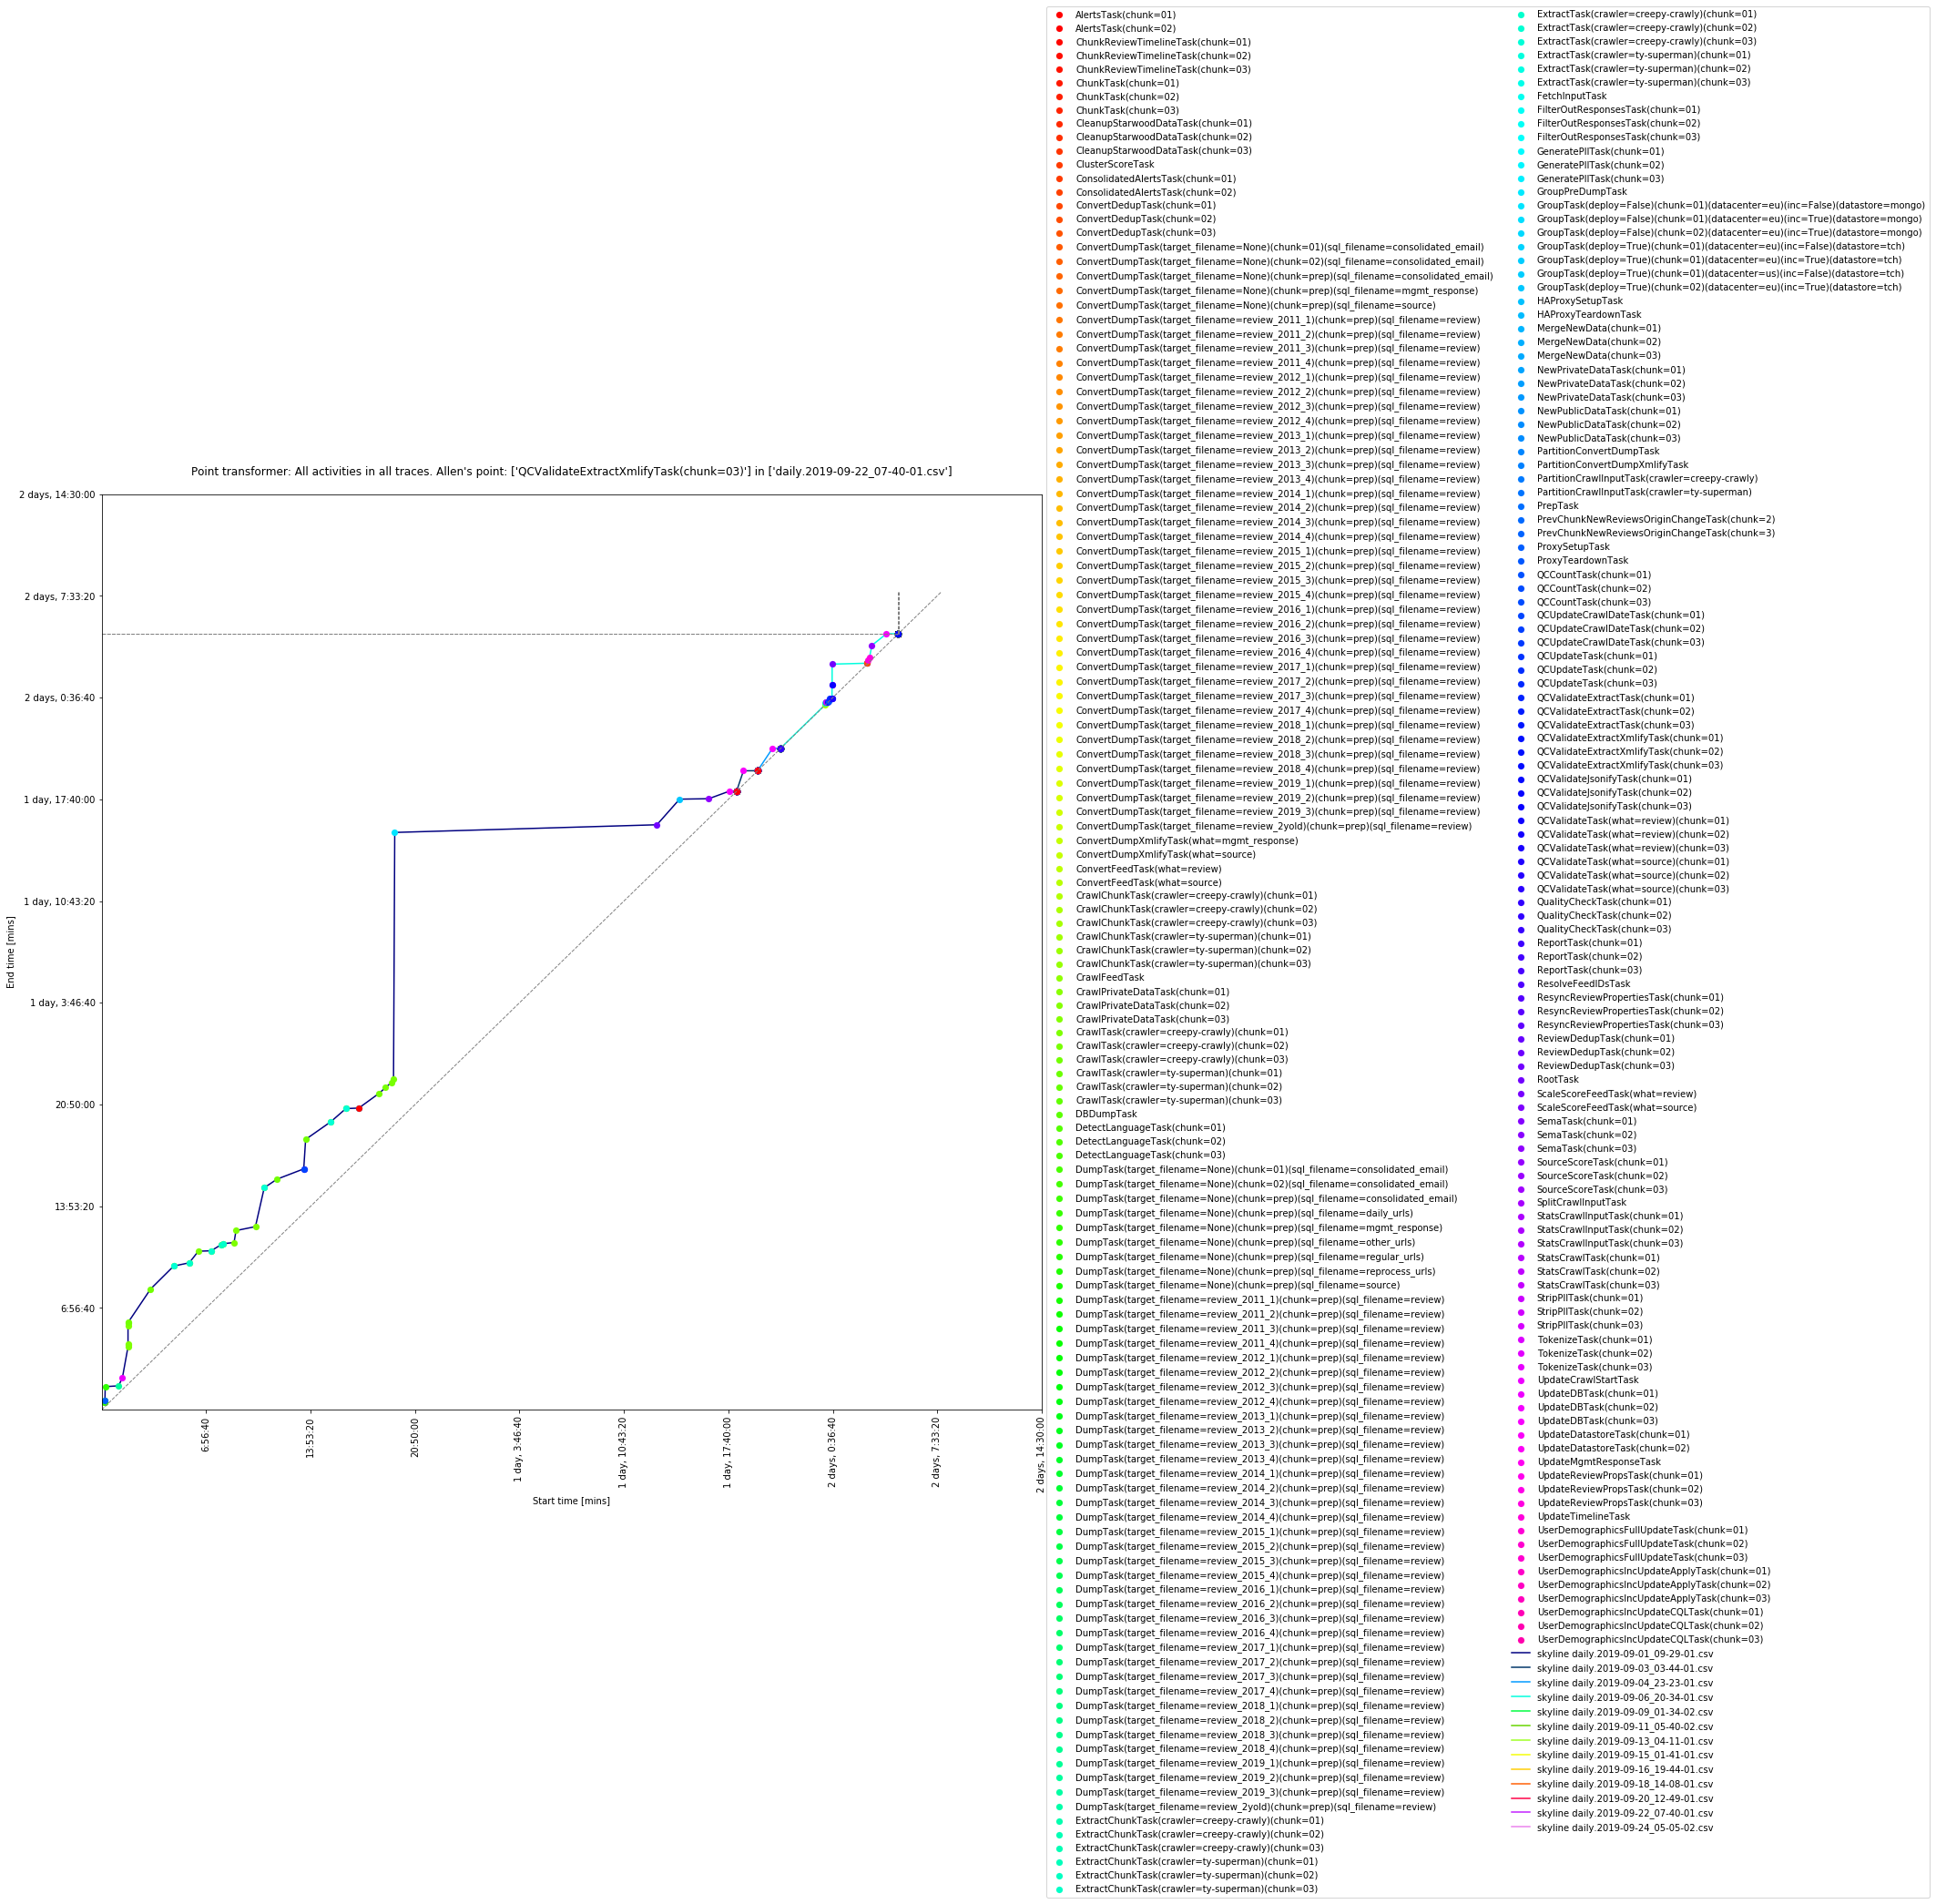

In [25]:
pt.plot_all_traces(snippet=skyline_points, draw_skylines=1, show_plot=1)

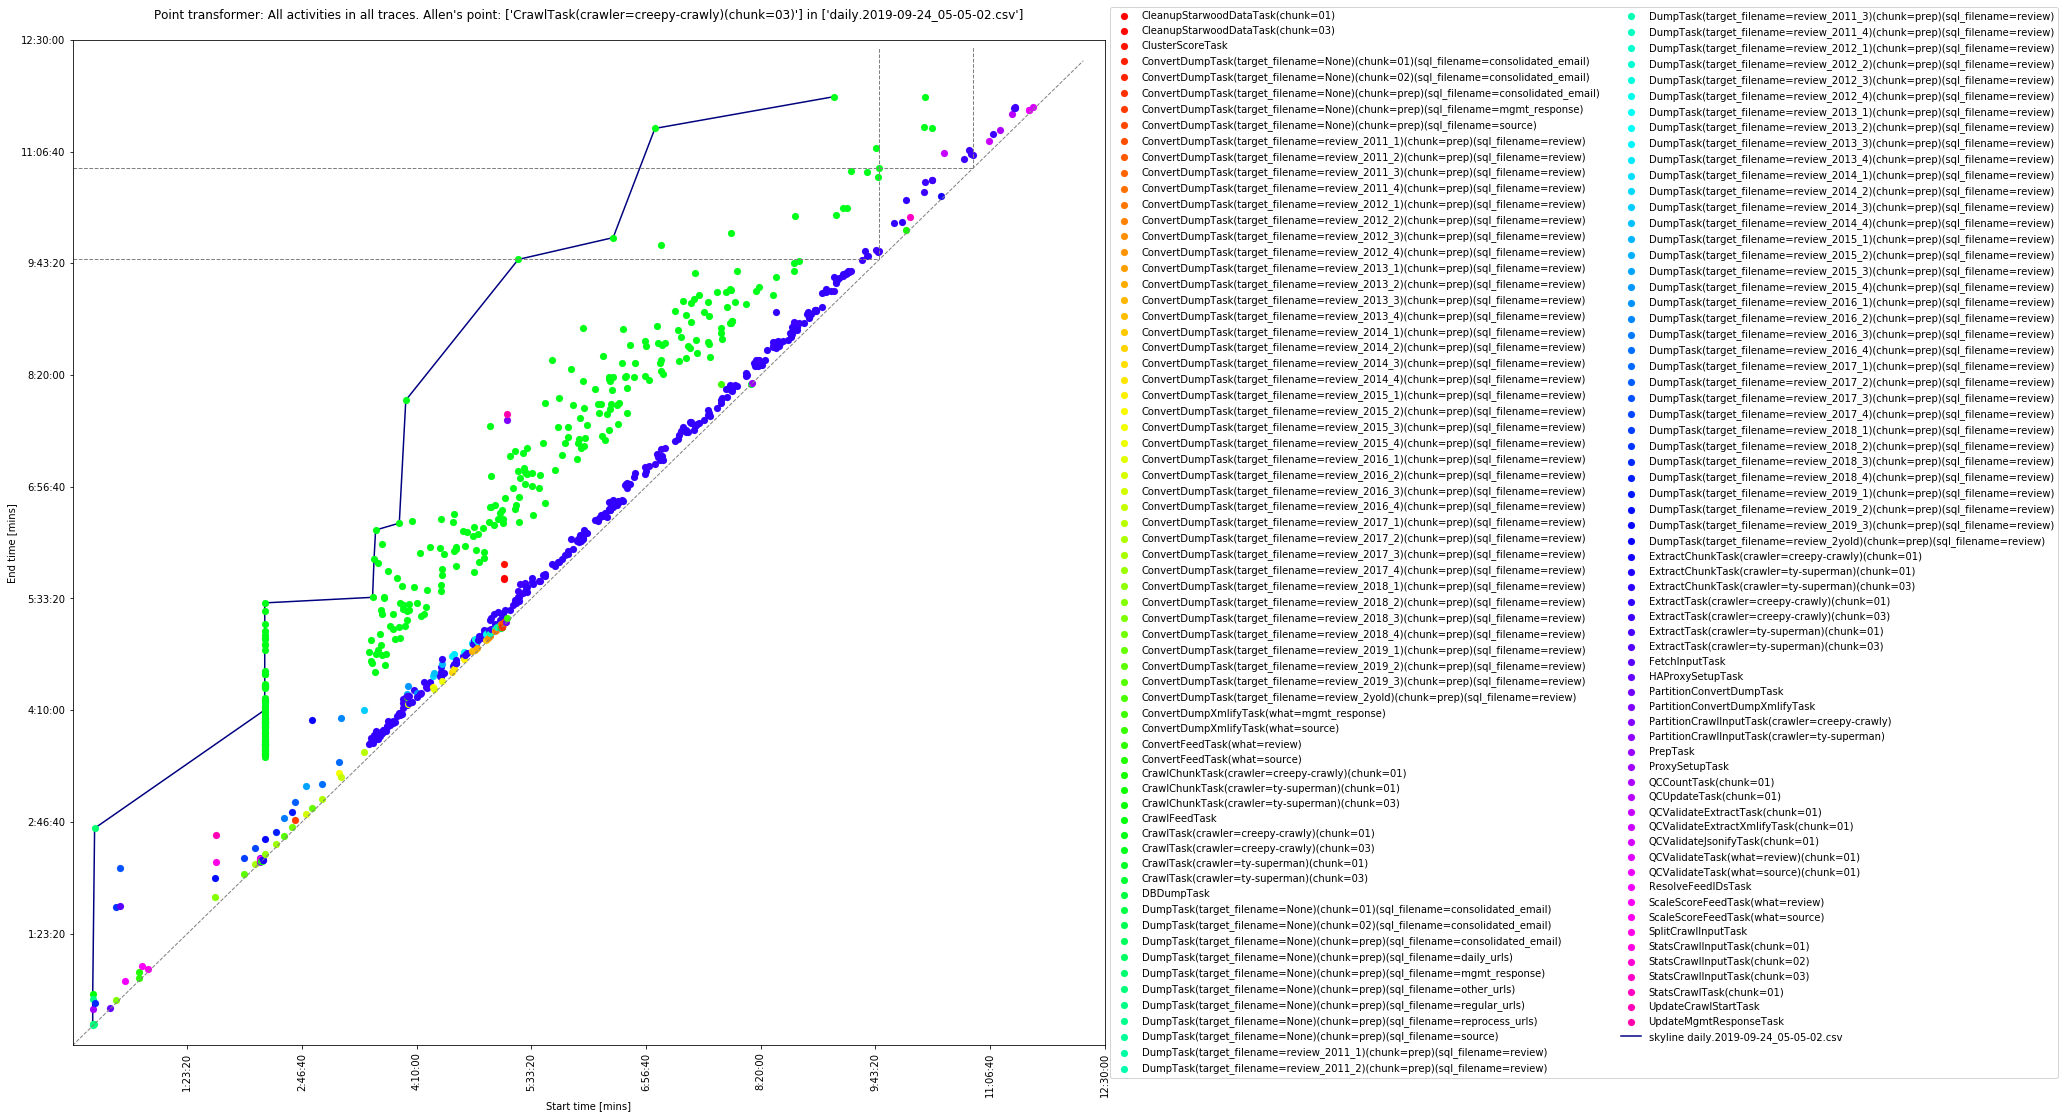

In [20]:
pt.plot_all_traces(snippet=subset[subset['case']=='daily.2019-09-24_05-05-02.csv'], draw_skylines=1)

In [17]:
for figure in plt.get_fignums():
    plt.close(figure)

Size


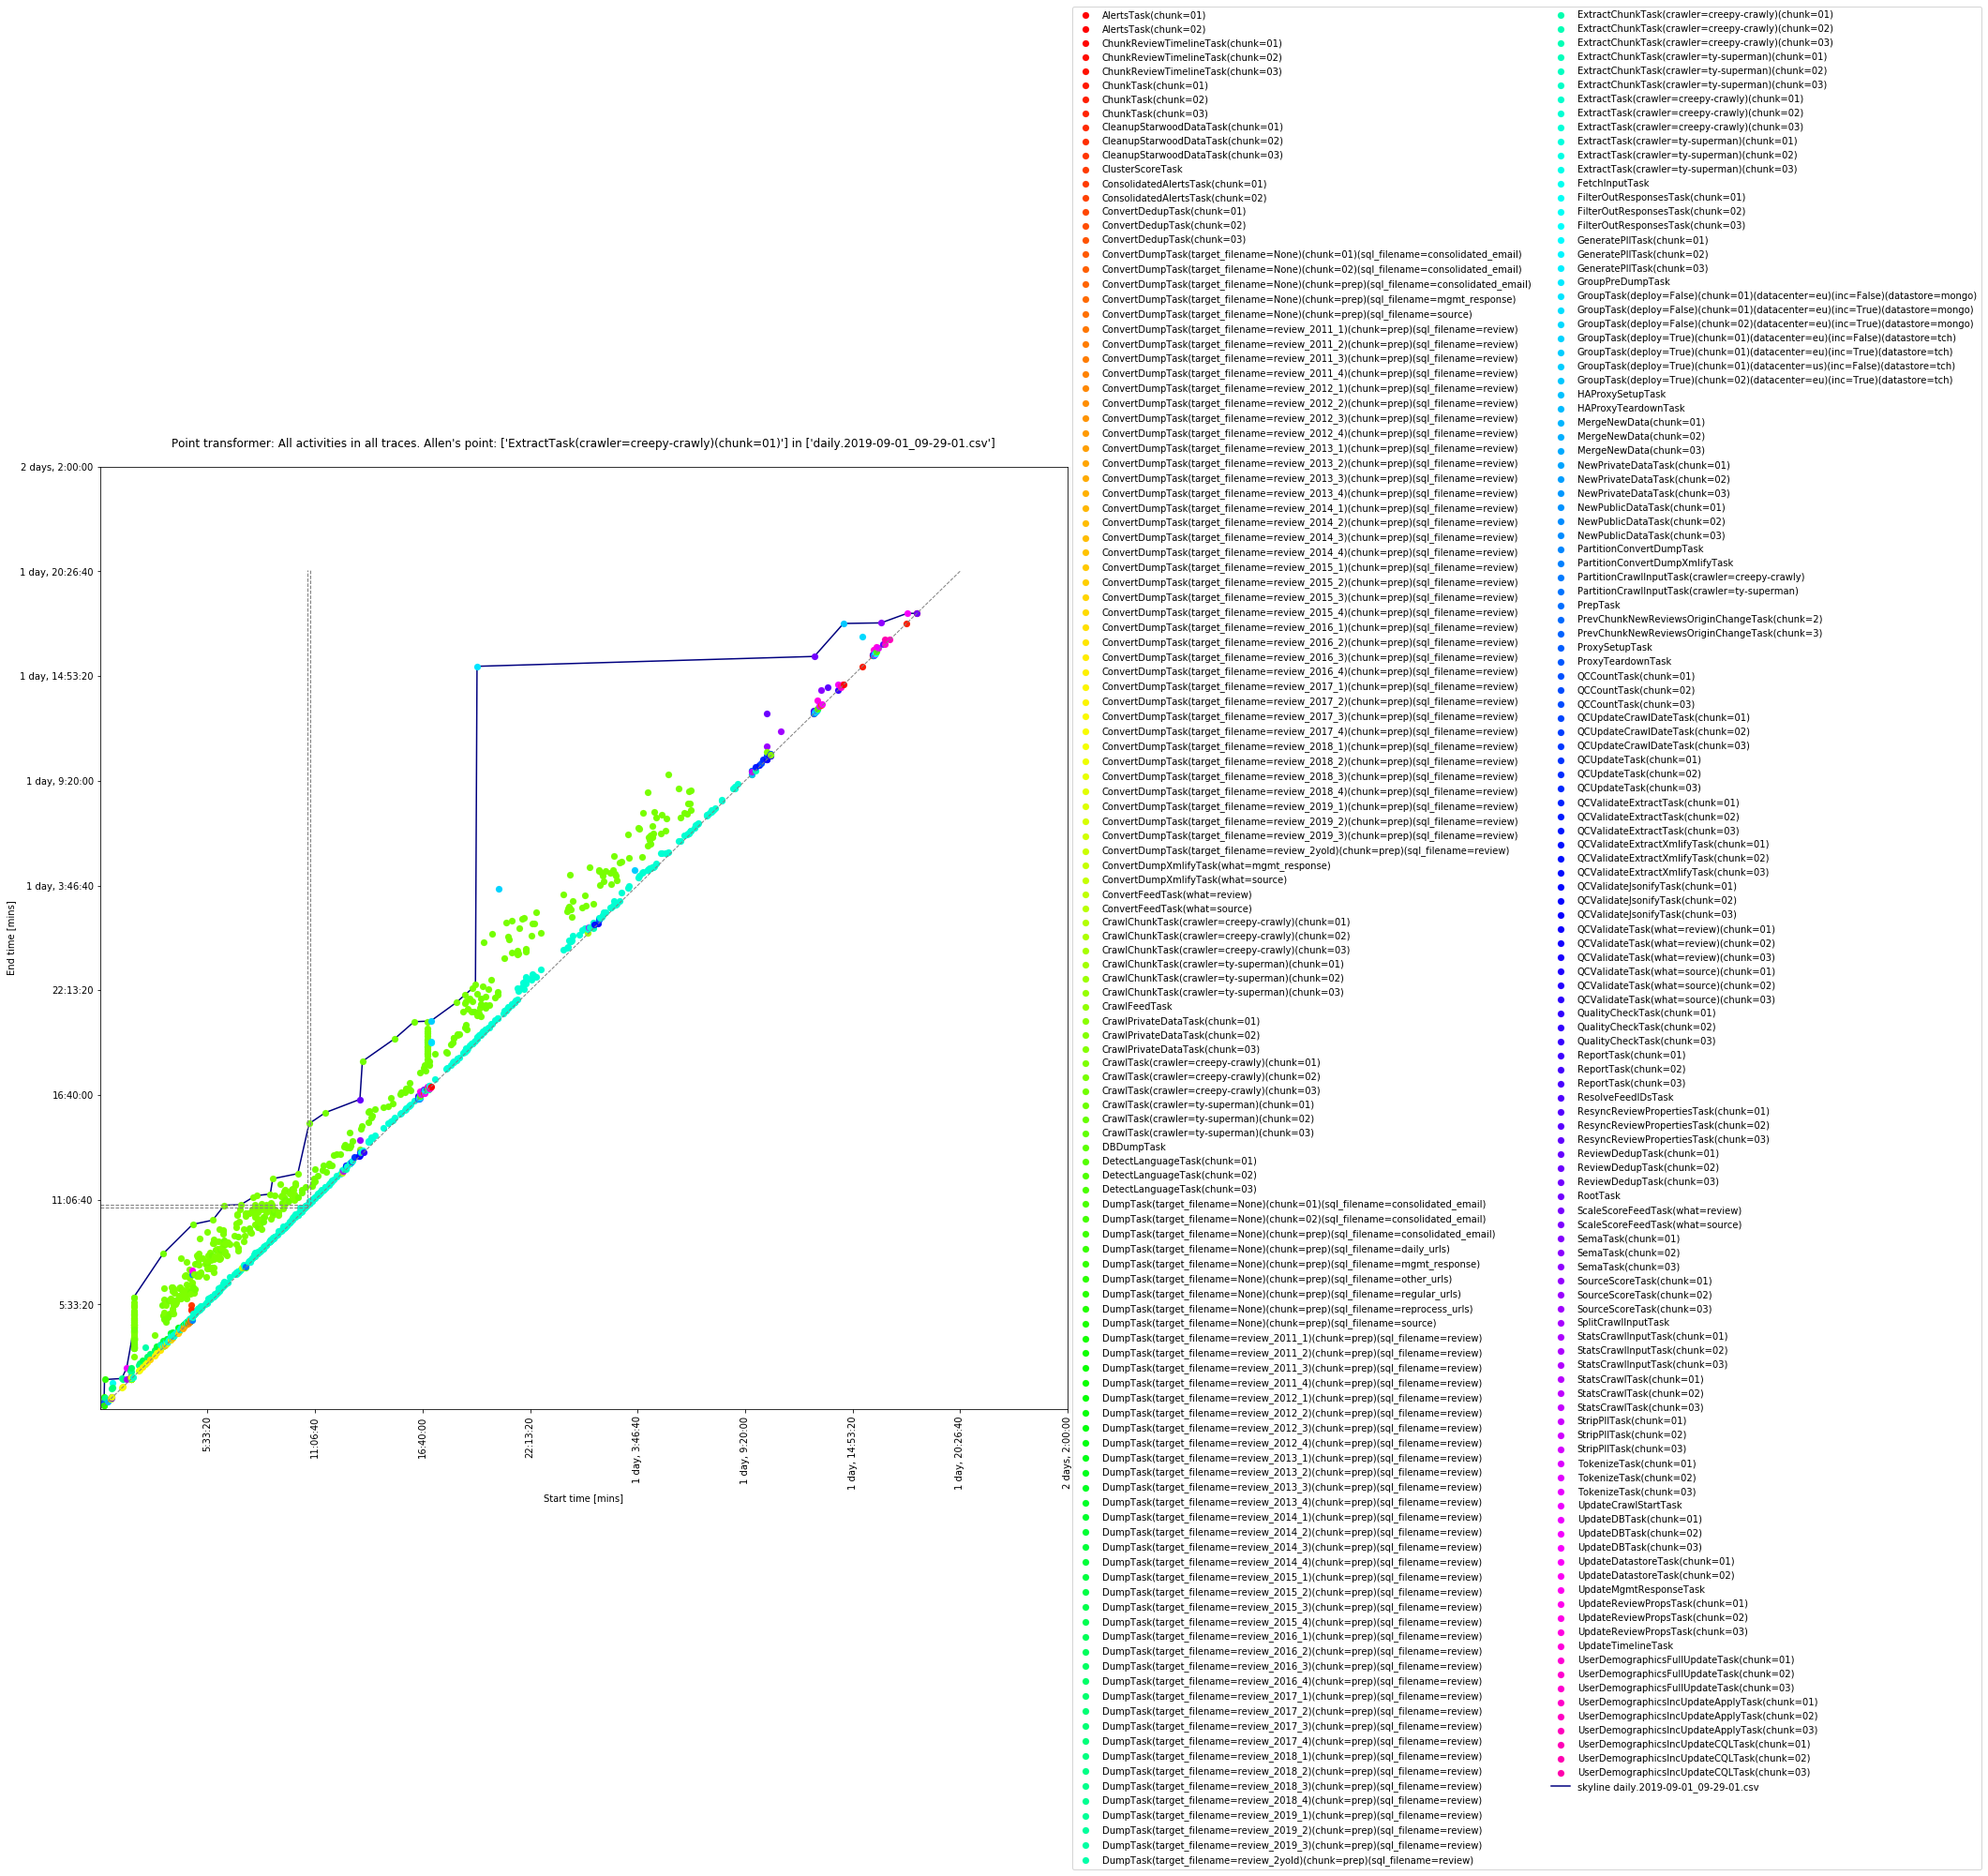

In [24]:
pt.plot_all_traces(snippet=subset[subset['case']=='daily.2019-09-01_09-29-01.csv'], draw_skylines=1, show_plot=1)


In [21]:
print(len(subset),' length of subset')

skyline_points = pt.get_skyline_points(subset)

print(len(skyline_points), 'points on the skylines')
skyline_points.head()

15708  length of subset
2883 points on the skylines


num_start  num_end  \
0      772.0   1913.0   
1      772.0   1913.0   
2      772.0   1913.0   
3      772.0   2379.0   
4      772.0   2379.0   

                                                                activity  \
0                                                          CrawlFeedTask   
1    DumpTask(target_filename=None)(chunk=prep)(sql_filename=other_urls)   
2    DumpTask(target_filename=None)(chunk=prep)(sql_filename=daily_urls)   
3  DumpTask(target_filename=None)(chunk=prep)(sql_filename=regular_urls)   
4                                                         ProxySetupTask   

                            case  
0  daily.2019-09-01_09-29-01.csv  
1  daily.2019-09-01_09-29-01.csv  
2  daily.2019-09-01_09-29-01.csv  
3  daily.2019-09-01_09-29-01.csv  
4  daily.2019-09-01_09-29-01.csv

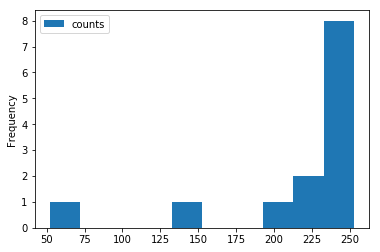

In [16]:
by_case = skyline_points.groupby('case').size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
by_case.plot.hist()

In [17]:
by_case

case  counts
4   daily.2019-09-09_01-34-02.csv  253   
5   daily.2019-09-11_05-40-02.csv  253   
6   daily.2019-09-13_04-11-01.csv  253   
7   daily.2019-09-15_01-41-01.csv  253   
8   daily.2019-09-16_19-44-01.csv  253   
9   daily.2019-09-18_14-08-01.csv  253   
10  daily.2019-09-20_12-49-01.csv  253   
11  daily.2019-09-22_07-40-01.csv  253   
1   daily.2019-09-03_03-44-01.csv  231   
2   daily.2019-09-04_23-23-01.csv  231   
3   daily.2019-09-06_20-34-01.csv  211   
12  daily.2019-09-24_05-05-02.csv  134   
0   daily.2019-09-01_09-29-01.csv  52

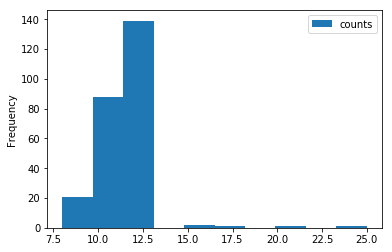

In [18]:
by_activity = skyline_points.groupby('activity').size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
#print(by_activity)
by_activity.plot.hist()

In [19]:
by_activity.head()

activity  counts
72   CrawlTask(crawler=creepy-crawly)(chunk=01)    25    
74   CrawlTask(crawler=creepy-crawly)(chunk=03)    20    
135  ExtractTask(crawler=creepy-crawly)(chunk=03)  17    
133  ExtractTask(crawler=creepy-crawly)(chunk=01)  16    
73   CrawlTask(crawler=creepy-crawly)(chunk=02)    15

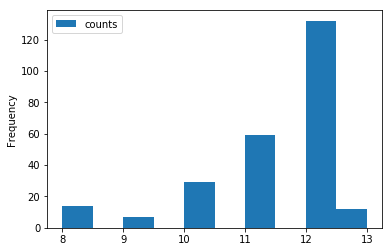

In [20]:
representative = skyline_points[['case','activity']].drop_duplicates()
r_by_activity = representative.groupby('activity').size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
r_by_activity.plot.hist()

In [21]:
r_by_activity.head()

activity  \
124  DumpTask(target_filename=review_2019_2)(chunk=prep)(sql_filename=review)   
172  ProxySetupTask                                                             
87   DumpTask(target_filename=None)(chunk=prep)(sql_filename=other_urls)        
88   DumpTask(target_filename=None)(chunk=prep)(sql_filename=regular_urls)      
74   CrawlTask(crawler=creepy-crawly)(chunk=03)                                 

     counts  
124  13      
172  13      
87   13      
88   13      
74   13

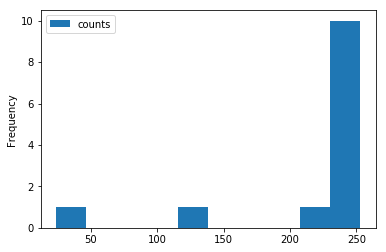

In [22]:
r_by_case = representative.groupby('case').size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
r_by_case.plot.hist()

In [23]:
r_by_case

case  counts
4   daily.2019-09-09_01-34-02.csv  253   
5   daily.2019-09-11_05-40-02.csv  253   
6   daily.2019-09-13_04-11-01.csv  253   
7   daily.2019-09-15_01-41-01.csv  253   
8   daily.2019-09-16_19-44-01.csv  253   
9   daily.2019-09-18_14-08-01.csv  253   
10  daily.2019-09-20_12-49-01.csv  253   
11  daily.2019-09-22_07-40-01.csv  253   
1   daily.2019-09-03_03-44-01.csv  231   
2   daily.2019-09-04_23-23-01.csv  231   
3   daily.2019-09-06_20-34-01.csv  210   
12  daily.2019-09-24_05-05-02.csv  134   
0   daily.2019-09-01_09-29-01.csv  24

In [24]:
#print(len(skyline_points), 'points are part of skylines')
unique_sk_activities = skyline_points['activity'].unique().tolist()
#print(len(unique_sk_activities), 'activities in the skyline')
skyline_points.groupby('case').size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

activities=[]
for i, case in enumerate(skyline_points['case'].unique()):
    acts = skyline_points[skyline_points['case']==case]['activity'].unique().tolist()
    activities.append(acts)
    #print(case, len(acts))

representative = skyline_points[['case','activity']].drop_duplicates()
rep_appereances = representative.groupby(by = ['activity']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
#rep_appereances = skyline_points.groupby(by = ['activity']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

pd.set_option('display.max_rows', None)
print('\n',len(rep_appereances), 'Activities appear in the skyline:')
rep_appereances.head()
#rep_appereances[rep_appereances['counts']<13]

#rep_appereances.groupby(by = ['counts']).size().reset_index(name='activities').sort_values(by=['counts'], ascending=False)


 253 Activities appear in the skyline:


activity  \
124  DumpTask(target_filename=review_2019_2)(chunk=prep)(sql_filename=review)   
172  ProxySetupTask                                                             
87   DumpTask(target_filename=None)(chunk=prep)(sql_filename=other_urls)        
88   DumpTask(target_filename=None)(chunk=prep)(sql_filename=regular_urls)      
74   CrawlTask(crawler=creepy-crawly)(chunk=03)                                 

     counts  
124  13      
172  13      
87   13      
88   13      
74   13